In [222]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [223]:
df = pd.read_csv('course_lead_scoring.csv')

In [224]:
df.head()
#
#

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


In [225]:
df.dtypes

lead_source                  object
industry                     object
number_of_courses_viewed      int64
annual_income               float64
employment_status            object
location                     object
interaction_count             int64
lead_score                  float64
converted                     int64
dtype: object

In [226]:
df.columns

Index(['lead_source', 'industry', 'number_of_courses_viewed', 'annual_income',
       'employment_status', 'location', 'interaction_count', 'lead_score',
       'converted'],
      dtype='object')

In [227]:
categorical = ['lead_source', 'industry','employment_status', 'location','converted']

numerical = ['number_of_courses_viewed','annual_income', 'interaction_count', 'lead_score']

In [228]:
df['industry'].value_counts()

industry
retail           203
finance          200
other            198
education        187
healthcare       187
technology       179
manufacturing    174
Name: count, dtype: int64

In [229]:
df[numerical].corr()

,number_of_courses_viewed,annual_income,interaction_count,lead_score
number_of_courses_viewed,1.000000,0.031551,-0.023565,-0.004879
annual_income,0.031551,1.000000,0.048618,0.005334
interaction_count,-0.023565,0.048618,1.000000,0.009888
lead_score,-0.004879,0.005334,0.009888,1.000000


In [230]:
categoricaldf=df[categorical]
categoricaldf.fillna('NA',inplace=True)

numdf=df[numerical]
numdf.fillna(0.0,inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_9668\2271782419.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categoricaldf.fillna('NA',inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_9668\2271782419.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numdf.fillna(0.0,inplace=True)


In [231]:
df= pd.concat([categoricaldf, numdf], axis=1)
df.head()

,lead_source,industry,employment_status,location,converted,number_of_courses_viewed,annual_income,interaction_count,lead_score
0,paid_ads,NA,unemployed,south_america,1,1,79450.0,4,0.94
1,social_media,retail,employed,south_america,0,1,46992.0,1,0.80
2,events,healthcare,unemployed,australia,1,5,78796.0,3,0.69
3,paid_ads,retail,NA,australia,0,2,83843.0,1,0.87
4,referral,education,self_employed,europe,1,3,85012.0,3,0.62


In [232]:
from sklearn.model_selection import train_test_split

df_fultrain,df_test=train_test_split(df,test_size=0.2,random_state=1)
df_train,df_val=train_test_split(df_fultrain,test_size=0.25,random_state=1)

In [233]:
df_fultrain['converted'].value_counts()

converted
1    715
0    454
Name: count, dtype: int64

In [234]:
globalconvert=df_fultrain['converted'].mean()

In [235]:
df_fultrain['converted'].value_counts(normalize=True)

converted
1    0.611634
0    0.388366
Name: proportion, dtype: float64

In [236]:
df_fultrain=df_fultrain.reset_index(drop=True)
df_train=df_train.reset_index(drop=True)
df_val=df_val.reset_index(drop=True)
df_test=df_test.reset_index(drop=True)

In [237]:
y_fultrain = df_fultrain['converted']
y_train = df_train['converted']
y_val = df_val['converted']
y_test = df_test['converted'] 


In [238]:
df_fultrain.groupby('industry')['converted'].agg(['mean','count'])

,mean,count
industry,,
NA,0.557522,113
education,0.751592,157
finance,0.587097,155
healthcare,0.597222,144
manufacturing,0.642384,151
other,0.602564,156
retail,0.581250,160
technology,0.548872,133


In [239]:
for c in categorical:
    df_group=df_fultrain.groupby(c)['converted'].agg(['mean','count'])
    df_group['diff']= df_group['mean'] - globalconvert
    df_group['risk']= df_group['mean'] / globalconvert
    print(df_group)
    print()
    print()


                    mean  count      diff      risk
lead_source                                        
NA              0.639175     97  0.027541  1.045029
events          0.604167    192 -0.007467  0.987791
organic_search  0.626087    230  0.014453  1.023630
paid_ads        0.439252    214 -0.172382  0.718162
referral        0.791262    206  0.179628  1.293686
social_media    0.591304    230 -0.020330  0.966762


                   mean  count      diff      risk
industry                                          
NA             0.557522    113 -0.054112  0.911529
education      0.751592    157  0.139958  1.228827
finance        0.587097    155 -0.024537  0.959883
healthcare     0.597222    144 -0.014412  0.976437
manufacturing  0.642384    151  0.030750  1.050276
other          0.602564    156 -0.009070  0.985171
retail         0.581250    160 -0.030384  0.950323
technology     0.548872    133 -0.062762  0.897387


                       mean  count      diff      risk
employment_stat

In [240]:
from sklearn.metrics import mutual_info_score

In [241]:
df_fultrain.isnull().sum()

lead_source                 0
industry                    0
employment_status           0
location                    0
converted                   0
number_of_courses_viewed    0
annual_income               0
interaction_count           0
lead_score                  0
dtype: int64

In [242]:
mutual_info_score(df_fultrain['converted'],df_fultrain['industry'])

0.008173022583466888

In [243]:
def mutual_infoscore(series):
    return mutual_info_score(series,y_fultrain)

In [244]:
df_fultrainc=df_fultrain[categorical].drop('converted',axis=1)


In [245]:
minfoscore=  df_fultrainc.apply(mutual_infoscore)
minfoscore.sort_values(ascending=False)

lead_source          0.024562
employment_status    0.012690
industry             0.008173
location             0.001212
dtype: float64

In [246]:
df_fultrain[numerical].corrwith(y_fultrain).sort_values(ascending=False)

number_of_courses_viewed    0.434872
interaction_count           0.387251
lead_score                  0.196394
annual_income               0.068845
dtype: float64

In [247]:
del df_train['converted']
del df_val['converted']
del df_test['converted']

In [248]:
train_dict= df_train.to_dict(orient='records')

In [249]:
train_dict[0]

{'lead_source': 'events',
 'industry': 'manufacturing',
 'employment_status': 'unemployed',
 'location': 'europe',
 'number_of_courses_viewed': 2,
 'annual_income': 95543.0,
 'interaction_count': 3,
 'lead_score': 0.78}

In [250]:
from sklearn.feature_extraction import DictVectorizer
dv= DictVectorizer(sparse=False)
dv.fit(train_dict)

,dtype,<class 'numpy.float64'>
,separator,'='
,sparse,False
,sort,True


In [251]:
dv.get_feature_names_out()

array(['annual_income', 'employment_status=NA',
       'employment_status=employed', 'employment_status=self_employed',
       'employment_status=student', 'employment_status=unemployed',
       'industry=NA', 'industry=education', 'industry=finance',
       'industry=healthcare', 'industry=manufacturing', 'industry=other',
       'industry=retail', 'industry=technology', 'interaction_count',
       'lead_score', 'lead_source=NA', 'lead_source=events',
       'lead_source=organic_search', 'lead_source=paid_ads',
       'lead_source=referral', 'lead_source=social_media', 'location=NA',
       'location=africa', 'location=asia', 'location=australia',
       'location=europe', 'location=middle_east',
       'location=north_america', 'location=south_america',
       'number_of_courses_viewed'], dtype=object)

In [252]:
x_train=dv.transform(train_dict)
x_train

array([[9.5543e+04, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        2.0000e+00],
       [5.4924e+04, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        1.0000e+00],
       [7.7352e+04, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        2.0000e+00],
       ...,
       [7.3702e+04, 0.0000e+00, 0.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        1.0000e+00],
       [9.3341e+04, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00]], shape=(876, 31))

In [253]:
val_dict= df_val.to_dict(orient='records')
test_dict= df_test.to_dict(orient='records')


x_val=dv.transform(val_dict)
x_test=dv.transform(test_dict)

In [254]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear',C=1.0,max_iter=1000,random_state=1)
model.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,1
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [255]:
model.intercept_

array([-0.10464329])

In [256]:
model.coef_.round(3)

array([[-0.   , -0.027,  0.035, -0.01 ,  0.014, -0.117, -0.022,  0.033,
        -0.008, -0.023, -0.007, -0.033, -0.027, -0.018,  0.326,  0.032,
         0.   , -0.005, -0.024, -0.112,  0.07 , -0.034,  0.005, -0.012,
        -0.01 , -0.028, -0.013, -0.019, -0.023, -0.005,  0.453]])

In [257]:
df_train.shape

(876, 8)

In [258]:
model.predict(x_train)

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [259]:
y_pred=model.predict_proba(x_train)

In [260]:
y_pred=model.predict_proba(x_val)[:,1]
y_pred=model.predict_proba(x_val)[:,1]

In [261]:
y_pred.shape

(293,)

In [262]:
threshold = np.linspace(0,1,21)
accuracyy=[]
for i in threshold:
    decision= (y_pred >= i)
    accuracy=(y_val == decision).mean()
    accuracyy.append(accuracy)
    print(f'for decision with {i} is \t\t\t',(y_val == decision).mean())


for decision with 0.0 is 			 0.5836177474402731
for decision with 0.05 is 			 0.5836177474402731
for decision with 0.1 is 			 0.5836177474402731
for decision with 0.15000000000000002 is 			 0.5836177474402731
for decision with 0.2 is 			 0.5836177474402731
for decision with 0.25 is 			 0.5836177474402731
for decision with 0.30000000000000004 is 			 0.5938566552901023
for decision with 0.35000000000000003 is 			 0.6006825938566553
for decision with 0.4 is 			 0.6416382252559727
for decision with 0.45 is 			 0.6791808873720137
for decision with 0.5 is 			 0.6996587030716723
for decision with 0.55 is 			 0.7474402730375427
for decision with 0.6000000000000001 is 			 0.7474402730375427
for decision with 0.65 is 			 0.7337883959044369
for decision with 0.7000000000000001 is 			 0.6928327645051194
for decision with 0.75 is 			 0.6552901023890785
for decision with 0.8 is 			 0.6143344709897611
for decision with 0.8500000000000001 is 			 0.5665529010238908
for decision with 0.9 is 			 0.494880

In [263]:
# threshold
# accuracyy

In [264]:
# import matplotlib.pyplot as plt
# plt.plot(threshold,accuracyy)

In [265]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

In [266]:
t=0.5
predict_positive = (y_pred >=t)
predict_negative = (y_pred <=t)

In [267]:
tp = (predict_positive & actual_positive).sum()

tn = (predict_negative & actual_negative).sum()


In [268]:
tn

np.int64(41)

In [269]:
tp

np.int64(164)

In [270]:
fp = (predict_positive & actual_negative).sum()

fn = (predict_negative & actual_positive).sum()


In [271]:
print(fp)
print(fn)

81
7


In [272]:
confusionmatric = np.array([[tn,fp],[fn,tp]])

In [273]:
(confusionmatric/confusionmatric.sum()).round(2)

array([[0.14, 0.28],
       [0.02, 0.56]])

precision and recall

In [274]:
precision = tp/(tp+fp)
precision

np.float64(0.6693877551020408)

In [ ]:
precision = tp/(tp+fp)
recall = tp/(tp+fn)
recall

np.float64(0.9590643274853801)

In [276]:
fprate = fp/(tn+fp)
fprate

np.float64(0.6639344262295082)

In [277]:
threshold = np.linspace(0,1,101)
scores=[]
for t in threshold:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    
    predict_positive = (y_pred >=t)
    predict_negative = (y_pred <=t)
    tp = (predict_positive & actual_positive).sum()

    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()

    fn = (predict_negative & actual_positive).sum()
    scores.append((t,tp,tn,fp,fn))





In [278]:
columns=['threshold','tp','tn','fp','fn']
df_scores =pd.DataFrame(scores,columns=columns)
df_scores[::10]

,threshold,tp,tn,fp,fn
0,0.0,171,0,122,0
10,0.1,171,0,122,0
20,0.2,171,0,122,0
30,0.3,171,3,119,0
40,0.4,171,17,105,0
50,0.5,164,41,81,7
60,0.6,150,69,53,21
70,0.7,106,97,25,65
80,0.8,64,116,6,107
90,0.9,24,121,1,147


In [279]:
df_scores['tpr']=df_scores.tp/(df_scores.tp+df_scores.fn)
df_scores['fpr'] = df_scores.fp/(df_scores.tn+df_scores.fp)


In [ ]:
plt.plot(df_scores.threshold,df_scores.tpr,label='tpr')
plt.plot(df_scores.threshold,df_scores.fpr,label='fpr')
plt.legend()

In [281]:
np.random.seed(1)
y_rand = np.random.uniform(0,1,size=len(y_val))
((y_rand >= 0.5)== y_val).mean()


np.float64(0.48464163822525597)

In [282]:
def tpr_fpr_dfframe(y_val,y_pred):
    threshold = np.linspace(0,1,101)
    scores=[]
    for t in threshold:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)
        
        predict_positive = (y_pred >=t)
        predict_negative = (y_pred <=t)
        tp = (predict_positive & actual_positive).sum()

        tn = (predict_negative & actual_negative).sum()

        fp = (predict_positive & actual_negative).sum()

        fn = (predict_negative & actual_positive).sum()
        scores.append((t,tp,tn,fp,fn))

    columns=['threshold','tp','tn','fp','fn']
    df_scores =pd.DataFrame(scores,columns=columns)

    df_scores['tpr']=df_scores.tp/(df_scores.tp+df_scores.fn)
    df_scores['fpr'] = df_scores.fp/(df_scores.tn+df_scores.fp)


    return df_scores

C:\Users\User\AppData\Local\Temp\ipykernel_9668\1895832456.py:18: RuntimeWarning: invalid value encountered in scalar divide
  precision = tp/(tp+fp)


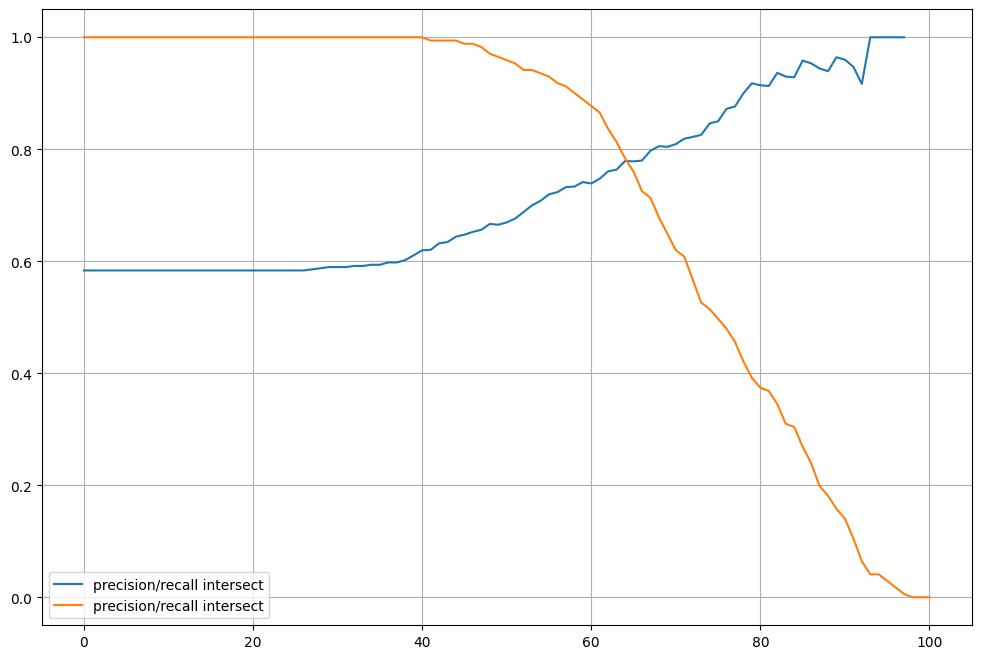

np.float64(0.8124999999999999)

In [309]:
threshold = np.linspace(0,1,101)
scores=[]
fscores = []
for t in threshold:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    
    predict_positive = (y_pred >=t)
    predict_negative = (y_pred <=t)
    tp = (predict_positive & actual_positive).sum()

    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()

    fn = (predict_negative & actual_positive).sum()
    
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    scores.append((t,tp,tn,fp,fn,precision,recall))

    columns=['threshold','tp','tn','fp','fn','precision','recall']
    F = 2*((precision*recall)/(precision+recall))
    fscores.append(F)
df_scores =pd.DataFrame(scores,columns=columns)
plt.figure(figsize=(12,8))
plt.plot(df_scores.precision,label='precision/recall intersect')
plt.plot(df_scores.recall,label='precision/recall intersect')
plt.grid()

plt.legend()
plt.show()

max(fscores)





In [283]:
df_rand = tpr_fpr_dfframe(y_val,y_rand)
df_rand[::10]

,threshold,tp,tn,fp,fn,tpr,fpr
0,0.0,171,0,122,0,1.000000,1.000000
10,0.1,153,14,108,18,0.894737,0.885246
20,0.2,135,26,96,36,0.789474,0.786885
30,0.3,120,35,87,51,0.701754,0.713115
40,0.4,105,44,78,66,0.614035,0.639344
50,0.5,90,52,70,81,0.526316,0.573770
60,0.6,68,67,55,103,0.397661,0.450820
70,0.7,47,79,43,124,0.274854,0.352459
80,0.8,36,92,30,135,0.210526,0.245902
90,0.9,18,104,18,153,0.105263,0.147541


In [284]:
# plt.plot(df_rand.threshold,df_rand.tpr,label='tpr')
# plt.plot(df_rand.threshold,df_rand.fpr,label='fpr')
# plt.legend()

In [285]:
num_neg =(y_val == 0).sum()
num_pos =(y_val == 1).sum()
num_neg,num_pos

(np.int64(122), np.int64(171))

In [286]:
y_ideal=np.repeat([0,1],[num_neg,num_pos])

In [287]:
y_ideal_pred=np.linspace(0,1,len(y_val))
1-y_val.mean()

np.float64(0.41638225255972694)

In [288]:
((y_ideal_pred >= 0.416)== y_ideal).mean()

np.float64(1.0)

In [289]:
df_ideal = tpr_fpr_dfframe(y_ideal,y_ideal_pred)

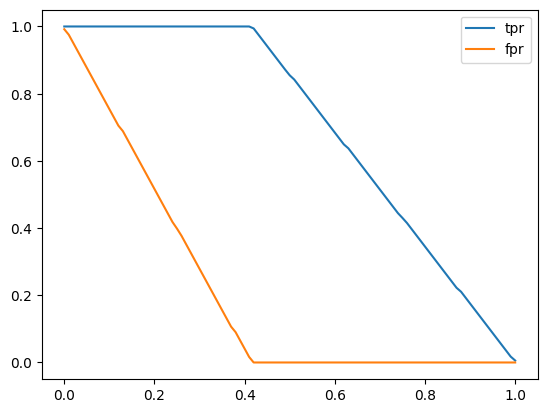

In [290]:
plt.plot(df_ideal.threshold,df_ideal.tpr,label='tpr')
plt.plot(df_ideal.threshold,df_ideal.fpr,label='fpr')
plt.legend()

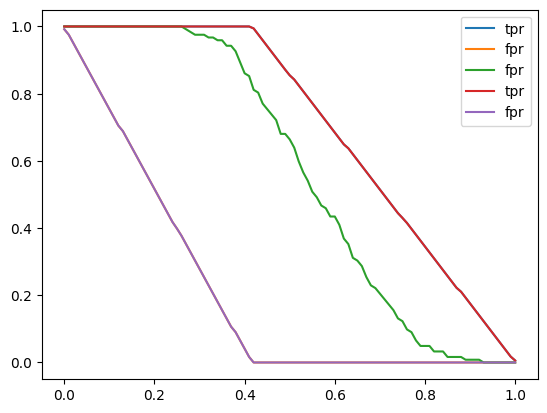

In [291]:
plt.plot(df_ideal.threshold,df_ideal.tpr,label='tpr')
plt.plot(df_ideal.threshold,df_ideal.fpr,label='fpr')
plt.plot(df_scores.threshold,df_scores.fpr,label='fpr')

plt.plot(df_ideal.threshold,df_ideal.tpr,label='tpr')
plt.plot(df_ideal.threshold,df_ideal.fpr,label='fpr')
plt.legend()

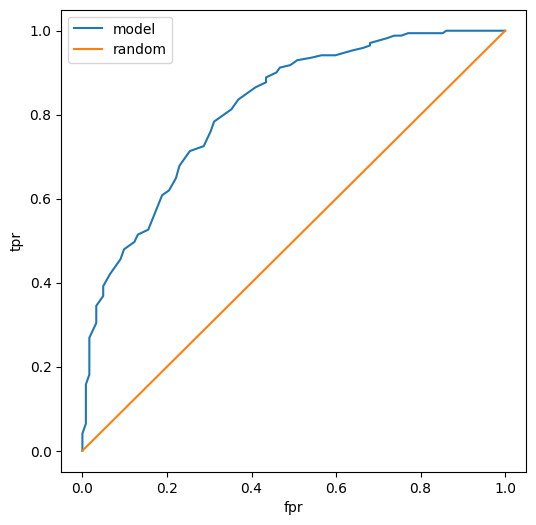

In [292]:
plt.figure(figsize=(6,6))
plt.plot(df_scores.fpr,df_scores.tpr,label='model')
plt.plot([0,1],[0,1],label='random')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.legend()

In [293]:
x_val

array([[0.0000e+00, 1.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [5.8777e+04, 1.0000e+00, 0.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        2.0000e+00],
       [7.8148e+04, 0.0000e+00, 1.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        3.0000e+00],
       ...,
       [9.2215e+04, 0.0000e+00, 1.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+00],
       [5.3087e+04, 0.0000e+00, 1.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        2.0000e+00],
       [6.0375e+04, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        3.0000e+00]], shape=(293, 31))

In [294]:
# from sklearn.metrics import roc_curve

# fpr,tpr,thresholds = roc_curve (y_val,y_pred)


# plt.plot(fpr,tpr,label='model')
# plt.plot([0,1],[0,1],label='random',linestyle='--')
# plt.xlabel('fpr')
# plt.ylabel('tpr')
# plt.legend()

In [310]:
# from sklearn.metrics import auc
# from sklearn.metrics import roc_auc_score

# auc(fpr,tpr)

In [ ]:
from sklearn.metrics import roc_auc_score

# y is the true binary target
# X is a DataFrame of numerical features
for col in numerical:
    score = df_val[col].values
    print(scores)
    auc = roc_auc_score(y_val, score)
    if auc < 0.5:  # invert if negatively correlated
        auc = roc_auc_score(y, -score)
    print(f"AUC of {col}: {auc:.3f}")

[(np.float64(0.0), np.int64(171), np.int64(0), np.int64(122), np.int64(0)), (np.float64(0.01), np.int64(171), np.int64(0), np.int64(122), np.int64(0)), (np.float64(0.02), np.int64(171), np.int64(0), np.int64(122), np.int64(0)), (np.float64(0.03), np.int64(171), np.int64(0), np.int64(122), np.int64(0)), (np.float64(0.04), np.int64(171), np.int64(0), np.int64(122), np.int64(0)), (np.float64(0.05), np.int64(171), np.int64(0), np.int64(122), np.int64(0)), (np.float64(0.06), np.int64(171), np.int64(0), np.int64(122), np.int64(0)), (np.float64(0.07), np.int64(171), np.int64(0), np.int64(122), np.int64(0)), (np.float64(0.08), np.int64(171), np.int64(0), np.int64(122), np.int64(0)), (np.float64(0.09), np.int64(171), np.int64(0), np.int64(122), np.int64(0)), (np.float64(0.1), np.int64(171), np.int64(0), np.int64(122), np.int64(0)), (np.float64(0.11), np.int64(171), np.int64(0), np.int64(122), np.int64(0)), (np.float64(0.12), np.int64(171), np.int64(0), np.int64(122), np.int64(0)), (np.float64(0

In [296]:
threshold = np.linspace(0,1,101)
scores=[]
for t in threshold:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    
    predict_positive = (y_pred >=t)
    predict_negative = (y_pred <=t)
    tp = (predict_positive & actual_positive).sum()

    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()

    fn = (predict_negative & actual_positive).sum()
    
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    scores.append((t,tp,tn,fp,fn,precision,recall))
    columns=['threshold','tp','tn','fp','fn','precision','recall']
    df_scores =pd.DataFrame(scores,columns=columns)
plt.plot(df_ideal.precision,df_ideal.recall,label='precision/recall intersect')

plt.legend()





C:\Users\User\AppData\Local\Temp\ipykernel_9668\1275926294.py:17: RuntimeWarning: invalid value encountered in scalar divide
  precision = tp/(tp+fp)


AttributeError: 'DataFrame' object has no attribute 'precision'